In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
spam = pd.read_csv('data/spam.csv', encoding='latin-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
# del spam['Unnamed:2','Unnamed:3','Unnamed:4' ]]
spam = spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
# spam = spam[['v1','v2']]
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam = spam.rename({'v1':'class', 'v2':'text'}, axis=1)

In [6]:
X = spam['text']
y = spam['class']

In [7]:
tf =  CountVectorizer()
tf.fit(X)
X_vec = tf.transform(X).toarray()

In [8]:
X.shape

(5572,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_vec,
                                                    y,
                                                    random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.9095477386934674

In [13]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test, y_test)

C:\Users\manis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8585786073223259

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb.score(X_test, y_test)

0.9849246231155779

In [17]:
sample = input('ask a question: ')
vec = tf.transform([sample]).toarray()
svm.predict(vec)

ask a question:  what is the delivery date ?


array(['ham'], dtype=object)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(2)
x_2d = pca.fit_transform(X_vec)

In [32]:
import seaborn as sns
iris = sns.load_dataset('iris')
x =iris.drop('species', axis = 1)
x.shape, x_2d.shape

((150, 4), (5572, 2))

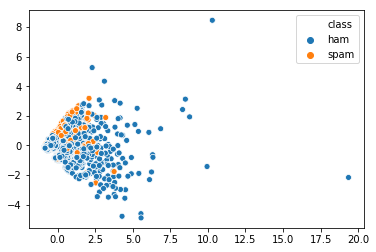

In [33]:
sns.scatterplot(x_2d[:,0], x_2d[:,1], hue=spam['class'])

In [29]:
import pickle
f= open('nb.pickle', 'rb')
a = pickle.load(f)
f.close()